## Eksempel: Lotka-Volterra-modellen for oscillerende kjemiske reaksjoner

Dette er den tidligste foreslåtte forklaringen på hvorfor en reaksjon kan oscillerere. I 1920 foreslo Lotka følgende reaksjonsmekanisme (med tilhørende hastighetsligninger). Hvert reaksjonstrinn refererer til den **molekylære** mekanismen der reaktantmolekylene kombineres for å produsere mellomprodukter eller sluttprodukter. For eksempel kombinerer i trinn 1 et molekyl av art A seg med et molekyl av art X for å danne to molekyler av art X. Dette trinnet reduserer antallet molekyler av A (og øker antallet av X) med en hastighet som er proporsjonal med produktet av konsentrasjonene av A og X. Bidrag fra de molekylære reaksjonstrinnene til de differensielle hastighetslovene:  

1. $ A + X \rightarrow 2X $, med reaksjonshastighet $ k_1 $  
2. $ X + Y \rightarrow 2Y $, med reaksjonshastighet $ k_2 $  
3. $ Y \rightarrow B $, med reaksjonshastighet $ k_3 $  

De effektive hastighetslovene for reaktanten A, produktet B, og mellomproduktene X og Y finnes ved å summere bidragene fra hvert trinn:  

$$
\frac{d[A]}{dt} = -k_1 [A][X]
$$  
$$
\frac{d[X]}{dt} = k_1 [A][X] - k_2 [X][Y]
$$  
$$
\frac{d[Y]}{dt} = k_2 [X][Y] - k_3 [Y]
$$  
$$
\frac{d[B]}{dt} = k_3 [Y]
$$  

**Instruksjoner:**  
Anta at konsentrasjonen av reaktanten A faktisk holdes konstant (den tilføres systemet med en hastighet som tilsvarer fjerningen ved reaksjonen). Merk også at  

$$
\frac{d(A+X+Y+B)}{dt} = 0
$$  

Dette betyr at summen $ A + X + Y + B $ alltid er konstant. Spesielt gjelder at $ A + B + X + Y = A_0 + X_0 + Y_0 $, forutsatt at det ikke er noe produkt B til stede i starten. Dette forteller oss at vi ikke trenger å løse ODE-en for $ B $, fordi $ B = X_0 - X + Y_0 - Y $ hvis vi kjenner $ X(t) $ og $ Y(t) $. Dermed kan systemet reduseres til to ODE-er for $ X $ og $ Y $ alene. Skriv opp systemet av differensialligninger i $X$ og $Y$ og løs for disse to med randbetingelsene $A = 1$, $X_0 = 1$, $Y_0 = 1$, $k_1 = 0.3$, $k_2 = 0.2$ og $k_3 = 0.3$.

In [6]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Denne funksjonen passer godt med brukergrensesnittet til solve_ivp
def lotkaVoltera(t, z, A, k1, k2, k3):
    x, y = z
    return [k1 * A * x - k2 * x * y, k2 * x * y - k3 * y]

In [7]:
sol = solve_ivp(lotkaVoltera, [0, 50], [1, 1], args=(1, 0.3, 0.2, 0.3), dense_output=True)

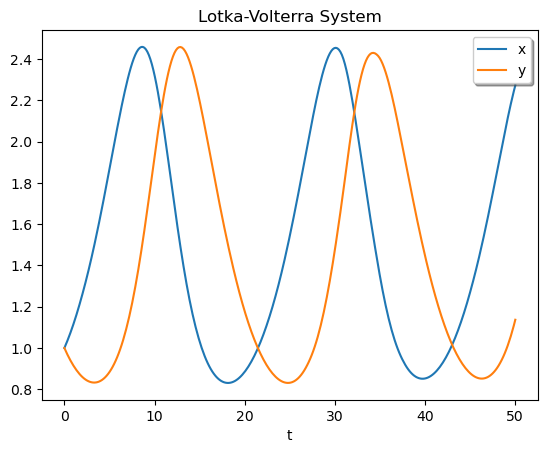

In [8]:
t = np.linspace(0, 50, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

## Oppgave

Bruk Eulers metode til å løse Lotka Volterra systemet over.